In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [25]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


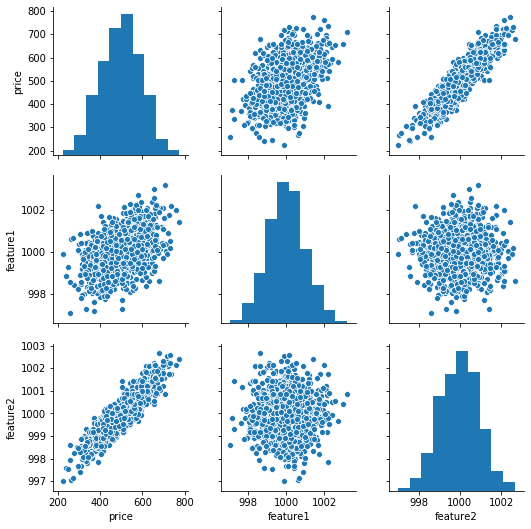

In [26]:
sns.pairplot(df) 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df[['feature1', 'feature2']].values

In [29]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [30]:
y = df['price'].values

In [31]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
X_train = scaler.transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[0.67400469, 0.29486593],
       [0.36988725, 0.51266913],
       [0.17952931, 0.72340152],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [41]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [42]:
model.fit(x=X_train, y=y_train, epochs=250)

Train on 670 samples
Epoch 1/250
670/670 [==============================] - 1s 1ms/sample - loss: 256264.4042
Epoch 2/250
670/670 [==============================] - 0s 80us/sample - loss: 256025.7366
Epoch 3/250
670/670 [==============================] - 0s 80us/sample - loss: 255773.7562
Epoch 4/250
670/670 [==============================] - 0s 77us/sample - loss: 255496.5271
Epoch 5/250
670/670 [==============================] - 0s 81us/sample - loss: 255191.9197
Epoch 6/250
670/670 [==============================] - 0s 76us/sample - loss: 254857.0598
Epoch 7/250
670/670 [==============================] - 0s 90us/sample - loss: 254492.5192
Epoch 8/250
670/670 [==============================] - 0s 90us/sample - loss: 254097.9718
Epoch 9/250
670/670 [==============================] - 0s 80us/sample - loss: 253669.1641
Epoch 10/250
670/670 [==============================] - 0s 77us/sample - loss: 253205.3021
Epoch 11/250
670/670 [==============================] - 0s 78us/sample - loss: 

In [43]:
loss_df = pd.DataFrame(model.history.history)

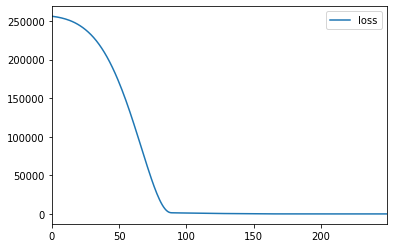

In [44]:
loss_df.plot()

In [45]:
model.evaluate(x=X_test, y=y_test, verbose=0)

24.292180864738697

In [46]:
model.evaluate(X_train, y_train)

670/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

24.03746463718699

In [57]:
test_predictions = model.predict(X_test)

In [58]:
test_predictions = pd.Series(test_predictions.reshape(330,))

In [59]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [60]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [69]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [70]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.450287
1,624.156198,623.828308
2,582.455066,592.423706
3,578.588606,572.435242
4,371.224104,366.659729
...,...,...
325,535.543676,535.250488
326,425.843651,433.606049
327,368.920095,370.952789
328,505.631884,499.175751


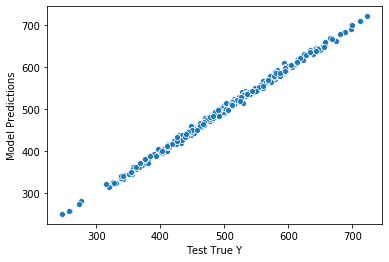

In [72]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [74]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.9456640297241212

In [75]:
new_gem = [[998, 1000]]

In [76]:
new_gem = scaler.transform(new_gem)

In [77]:
model.predict(new_gem)

array([[419.76764]], dtype=float32)

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model.save('my_gem_model.h5')